In [3]:
import tensorflow as tf
print (tf.__version__)


1.13.1


In [4]:
import keras
print(keras.__version__)

2.2.4


Using TensorFlow backend.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [6]:
observations = 1000

xs = np.random.uniform(-10,10,size = (observations,1))
zs = np.random.uniform(-10,10,size = (observations,1))

inputs = np.column_stack((xs, zs))

In [7]:
print(inputs.shape)

(1000, 2)


In [8]:
noise = np.random.uniform(-1,1,size = (observations,1))

target = 3*xs -2*zs + 7 + noise

In [9]:
print(target.shape)

(1000, 1)


In [10]:
weights = np.random.uniform(-0.1, 0.1, size = (2,1))
biases = np.random.uniform(-0.1,0.1, size = (1,1))
learning_rate = 0.01


Training

In [11]:
for i in range(100):
    outputs = np.dot(inputs,weights) + biases
    deltas = outputs - target
    
    loss = np.sum(deltas**2)/2/observations #average loss
    
    print(loss)
    
    scaled_deltas = deltas/observations
    
    weights = weights - learning_rate*(np.dot(inputs.T, scaled_deltas))
    biases = biases - learning_rate*(np.sum(scaled_deltas))
    

243.6656235420677
122.10788387499674
67.46119316407253
42.73854866743146
31.41272941918996
26.09216738610212
23.46823013671004
22.0586412750762
21.198767967298977
20.59032575396762
20.099301967686028
19.665399433210165
19.261424476435298
18.875060200418105
18.50068055720403
18.135671436479626
17.778776223697307
17.429351314227674
17.08703089119246
16.751575885087615
16.422805868582305
16.100568316647774
15.784724710054967
15.475144235428845
15.171700913307014
14.874272274073647
14.582738733390462
14.296983284138511
14.016891331902261
13.742350595843188
13.47325103963253
13.209484816461224
12.95094622088969
12.697531644254392
12.449139532136229
12.205670343205412
11.967026509123572
11.733112395350018
11.503834262774381
11.279100230132148
11.058820237175285
10.842906008577364
10.63127101855618
10.423830456198507
10.22050119147242
10.021201741913515
9.825852239971429
9.634374401003553
9.446691491903135
9.262728300349114
9.082411104665441
8.905667644277727
8.732427090755456
8.5626200194280

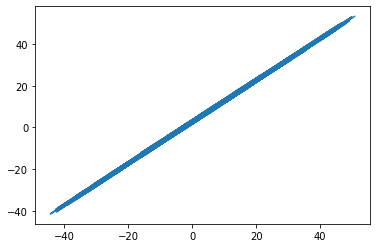

In [12]:
plt.plot(outputs, target)
plt.show()

In [13]:
observations = 10000
x = np.random.uniform(-10,10, size = (observations,1))
y = np.random.uniform(-10,10, size = (observations,1))
z = np.random.uniform(-10,10, size = (observations,1))

inputs = np.column_stack((x,y,z))
noise = np.random.uniform(-1,1, size = (observations,1))

targets = 4*x +7*y - z + 7 + noise

biases = np.random.uniform(-0.5,0.5,size = (1,1))
weights = np.random.uniform(-0.5,0.5,size = (3,1))
learning_rate = 0.01

np.savez("Initial_File", file_input = inputs, file_target = targets)


In [14]:
for i in range (100):
    outputs = np.dot(inputs,weights) + biases
    deltas = outputs - targets
    loss = np.sum(np.absolute(deltas))/observations
    print(loss)
    deltas_scaled = deltas/observations
    
    biases = biases - learning_rate*(np.sum(deltas_scaled))
    weights = weights - learning_rate*(np.dot(inputs.T,deltas_scaled))
    

41.13094694992668
27.79277518472448
19.008497350540832
13.322357657420012
9.797847395406151
7.80662783395916
6.901102562964274
6.657944058485933
6.584597633182937
6.516480123054132
6.449789244180928
6.384268205741415
6.31974166950087
6.256089275837115
6.193227781401393
6.131099006936134
6.069661705186599
6.008886073724603
5.948750052335689
5.8892368244952555
5.830333131283897
5.772028133489765
5.714312643600677
5.657178607383068
5.600618753874434
5.544626359017808
5.4891950859808345
5.43431887722198
5.379991881476828
5.326208404309976
5.272962874570705
5.220249821582282
5.168063859576193
5.116399677016982
5.065252029229132
5.014615733253852
4.964485664212365
4.914856752687479
4.865723982793953
4.817082390715317
4.768927063557073
4.721253138415018
4.674055801590275
4.627330287904932
4.581071880087092
4.53527590820433
4.489937749131268
4.445052826041764
4.400616607919104
4.356624609079898
4.313072388708601
4.269955550400719
4.227269741713241
4.185010653721399
4.143174020581086
4.10175561

In [23]:
training_data = np.load("Initial_File.npz")
import keras.losses

In [24]:
input_size = 3
output_size = 1

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size)
])

model_1.compile(optimizer = "sgd", loss = "huber_loss")

In [25]:
model_1.fit(training_data["file_input"], training_data["file_target"], epochs = 50)

ValueError: Unknown loss function:huber_loss

In [17]:
model_1.layers[0].get_weights()

[array([[ 4.00118  ],
        [ 7.0019245],
        [-1.0197214]], dtype=float32), array([6.993251], dtype=float32)]

In [1]:
model_1.predict_on_batch(training_data["file_input"])

NameError: name 'model_1' is not defined